In [108]:
from jw_package import *
from filling_missing import *
from functools import *

In [109]:
each_station = []

for station_nbr in range(1,21):
    file_path = '../data/weather_partial_mean_all_best_close/{:02}.csv'.format(station_nbr)
    station = pd.read_csv(file_path,index_col=0)
    each_station.append(station)

weather = reduce((lambda x,y : x.append(y)),each_station)

In [110]:
weather.tail()

,avgspeed,codesum,cool,date,day,depart,dewpoint,heat,month,preciptotal,...,snowfall,station_nbr,stnpressure,sunrise,sunset,tavg,tmax,tmin,wetbulb,year
1030,10.4,,11.0,2014-10-27,27,7.0,59.0,0.0,10,0.0,...,0.0,20,29.11,-,-,76.0,85.0,66.0,65.0,2014
1031,6.4,,9.0,2014-10-28,28,3.0,60.0,0.0,10,0.0,...,0.0,20,29.30,-,-,74.0,80.0,68.0,65.0,2014
1032,6.1,,2.0,2014-10-29,29,6.0,47.0,0.0,10,0.0,...,0.0,20,29.42,-,-,67.0,78.0,55.0,56.0,2014
1033,4.9,,1.0,2014-10-30,30,6.0,50.0,0.0,10,0.0,...,0.0,20,29.40,-,-,66.0,80.0,52.0,57.0,2014
1034,11.2,,0.0,2014-10-31,31,13.0,39.0,6.0,10,0.0,...,0.0,20,29.57,-,-,59.0,68.0,50.0,50.0,2014


In [111]:
sales = pd.read_csv('../data/basic/train.csv')
keys = pd.read_csv('../data/basic/key.csv')

In [112]:
data = sales.merge(keys).merge(weather)

In [113]:
for each in etc+category:
    data.drop(each,axis=1,inplace=True)

In [114]:
data = data[data['units']!=0]

In [115]:
data.head()

,date,store_nbr,item_nbr,units,avgspeed,cool,depart,dewpoint,heat,preciptotal,resultdir,resultspeed,sealevel,snowfall,stnpressure,tavg,tmax,tmin,wetbulb
8,2012-01-01,1,9,29,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
27,2012-01-01,1,28,2,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
50,2012-01-01,1,51,1,4.6,0.0,8.0,36.0,23.0,0.05,20.0,3.6,29.92,0.0,29.78,42.0,52.0,31.0,40.0
119,2012-01-02,1,9,60,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0
138,2012-01-02,1,28,5,10.3,0.0,11.0,26.0,24.0,0.01,24.0,9.8,29.62,0.0,29.44,41.0,50.0,31.0,35.0


In [116]:
tmp = data.copy()

In [117]:
del tmp['tavg']
del tmp['sealevel']
del tmp['wetbulb']
del tmp['stnpressure']
del tmp['tmin']
del tmp['tmax']
del tmp['dewpoint']
del tmp['avgspeed']
del tmp['resultspeed']

In [118]:
tmp.reset_index(drop = True, inplace = True)

In [119]:
tmp.tail()

,date,store_nbr,item_nbr,units,cool,depart,heat,preciptotal,resultdir,snowfall
118691,2014-10-29,35,66,14,1.866667,4.8,4.466667,0.130333,23.0,0.0
118692,2014-10-30,35,16,16,1.866667,4.8,4.466667,0.130333,30.0,0.0
118693,2014-10-30,35,66,6,1.866667,4.8,4.466667,0.130333,30.0,0.0
118694,2014-10-31,35,16,18,1.866667,4.8,4.466667,0.130333,5.0,0.0
118695,2014-10-31,35,66,10,1.866667,4.8,4.466667,0.130333,5.0,0.0


In [120]:
codesum = pd.read_csv('../data/weather_v1.csv', index_col = 0)

In [121]:
codesum = codesum.merge(keys, on = 'station_nbr' )

In [122]:
codesum = codesum.loc[:,['date','store_nbr','is_holiday','codesum']]

In [123]:
tmp = tmp.merge(codesum, on = ['date','store_nbr'])

In [124]:
tmp.tail()

,date,store_nbr,item_nbr,units,cool,depart,heat,preciptotal,resultdir,snowfall,is_holiday,codesum
118691,2014-10-29,35,66,14,1.866667,4.8,4.466667,0.130333,23.0,0.0,workday,MO
118692,2014-10-30,35,16,16,1.866667,4.8,4.466667,0.130333,30.0,0.0,workday,MO
118693,2014-10-30,35,66,6,1.866667,4.8,4.466667,0.130333,30.0,0.0,workday,MO
118694,2014-10-31,35,16,18,1.866667,4.8,4.466667,0.130333,5.0,0.0,workday,MO
118695,2014-10-31,35,66,10,1.866667,4.8,4.466667,0.130333,5.0,0.0,workday,MO


In [125]:
data.reset_index(drop = True, inplace = True)

In [126]:
def cate_holiday(holiday):
    if holiday == 'holiday' or holiday == 'holiday_work':
            return 1
    else:
        return 0
def cate_codesum(codesum):
    if codesum == 'MO':
        return 0 
    else:
        return 1
    
tmp['is_holiday'] = tmp['is_holiday'].apply(cate_holiday)
tmp['codesum'] = tmp['codesum'].apply(cate_codesum)

In [29]:
formula = 'units ~ C(store_nbr) + C(item_nbr)+ scale(cool) + scale(heat) + scale(preciptotal) + scale(snowfall) + is_holiday'
model1 = sm.OLS.from_formula(formula,data=tmp)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:24:31   Log-Likelihood:            -5.7588e+05
No. Observations:              118696   AIC:                         1.152e+06
Df Residuals:                  118536   BIC:                         1.154e+06
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             15.0595      2

In [37]:
res = result1.resid_pearson
index = result1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [38]:
tmp.drop(list(drop_index),inplace=True)

In [41]:
model2 = sm.OLS.from_formula(formula,data=tmp)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:39:24   Log-Likelihood:            -4.9927e+05
No. Observations:              115428   AIC:                         9.989e+05
Df Residuals:                  115268   BIC:                         1.000e+06
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.5361      1

In [47]:
def regularized(model = model2, alpha = 0.01, L1_wt = 0):
    result = model.fit_regularized(alpha = alpha, L1_wt = L1_wt)
    print(alpha,L1_wt)
    print(result.params)

In [48]:
regularized(alpha = 0.01, L1_wt = 0)

0.01 0
[  1.50102045e+01   1.19613695e+01   3.36782917e+00   9.45543438e+00
  -4.53227952e+00  -1.06677785e-01   6.75361957e+00  -7.33177518e+00
   3.96752235e-02   2.40171320e+00  -4.30968692e+00   4.85562495e-01
   1.64078934e+01  -1.91082059e+01   5.33444174e+00   1.75279200e+01
   4.02855873e+01  -1.09682102e+01  -6.75911124e+00   4.87660902e+00
  -4.84738015e+00  -1.97240577e+00  -1.29454473e+01   6.54512808e+00
   1.11069123e+01  -5.42315784e+00  -5.84940583e+00  -7.39960895e+00
   2.30160219e+00   9.33454016e+00   3.83124626e+00  -8.49265016e+00
   3.79891046e+01   5.11490491e+00  -3.60116721e+00  -1.14636231e+01
  -7.44870050e+00   9.41261638e+00  -1.94565045e+01  -1.86274088e+00
  -1.38543766e-01  -2.52316770e+00   7.33052363e-01  -1.31898191e+00
  -1.37239084e+01  -4.43647131e+00  -2.82516296e+00  -2.45011754e-01
   2.76479371e+01   6.59686602e+00  -5.10387972e+00   5.61142784e+00
   3.10927808e+01  -3.45246974e+00  -5.83316918e+00  -5.99613864e+00
  -3.97220810e+00  -1.84002

In [68]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:55:58   Log-Likelihood:            -4.9927e+05
No. Observations:              115428   AIC:                         9.989e+05
Df Residuals:                  115268   BIC:                         1.000e+06
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.5361      1

In [74]:
formula = 'units ~ C(store_nbr) + C(item_nbr)+ cool + heat + preciptotal + snowfall + is_holiday + 0'
model3 = sm.OLS.from_formula(formula,data=tmp)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:59:06   Log-Likelihood:            -4.9927e+05
No. Observations:              115428   AIC:                         9.989e+05
Df Residuals:                  115268   BIC:                         1.000e+06
Df Model:                         159                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(store_nbr)[1]        9.8858      1

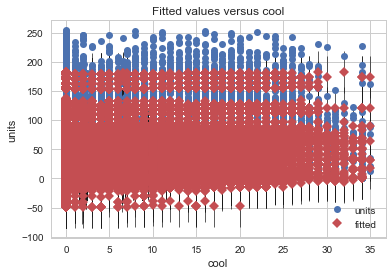

In [75]:
sm.graphics.plot_fit(result3, "cool")
plt.show()

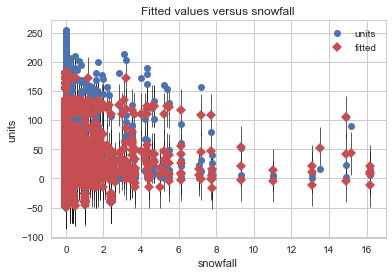

In [76]:
sm.graphics.plot_fit(result3, "snowfall")
plt.show()

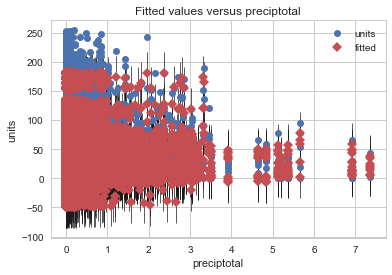

In [77]:
sm.graphics.plot_fit(result3, "preciptotal")
plt.show()

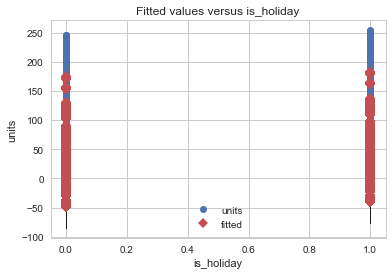

In [78]:
sm.graphics.plot_fit(result3, "is_holiday")
plt.show()

In [85]:
X.head()

,store_nbr,item_nbr,units,cool,heat,preciptotal,snowfall,is_holiday
0,1,9,29,0.0,23.0,0.05,0.0,1
1,1,28,2,0.0,23.0,0.05,0.0,1
2,1,51,1,0.0,23.0,0.05,0.0,1
3,1,9,60,0.0,24.0,0.01,0.0,1
4,1,28,5,0.0,24.0,0.01,0.0,1


In [84]:
y.shape

(115428, 1)

In [130]:
y = tmp.loc[:,['units']]
X = tmp.loc[:,['store_nbr', 'item_nbr', 'cool','depart', 'heat', 'preciptotal','resultdir', 'snowfall', 'is_holiday','codesum']]

In [128]:
tmp.head()

,date,store_nbr,item_nbr,units,cool,depart,heat,preciptotal,resultdir,snowfall,is_holiday,codesum
0,2012-01-01,1,9,29,0.0,8.0,23.0,0.05,20.0,0.0,1,1
1,2012-01-01,1,28,2,0.0,8.0,23.0,0.05,20.0,0.0,1,1
2,2012-01-01,1,51,1,0.0,8.0,23.0,0.05,20.0,0.0,1,1
3,2012-01-02,1,9,60,0.0,11.0,24.0,0.01,24.0,0.0,1,0
4,2012-01-02,1,28,5,0.0,11.0,24.0,0.01,24.0,0.0,1,0


In [135]:
X.shape

(118696, 10)

In [136]:
y.shape

(118696, 1)

In [133]:
X.head()

,store_nbr,item_nbr,cool,depart,heat,preciptotal,resultdir,snowfall,is_holiday,codesum
0,1,9,0.0,8.0,23.0,0.05,20.0,0.0,1,1
1,1,28,0.0,8.0,23.0,0.05,20.0,0.0,1,1
2,1,51,0.0,8.0,23.0,0.05,20.0,0.0,1,1
3,1,9,0.0,11.0,24.0,0.01,24.0,0.0,1,0
4,1,28,0.0,11.0,24.0,0.01,24.0,0.0,1,0


In [134]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=4, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print("test index :", test_index, len(test_index))
    print("." * 80)
    print("train index:", train_index, len(train_index))
    print("=" * 80)

    X_train = X.loc[train_index, :]
    X_test = X.loc[test_index, :]
    y_train = y.loc[train_index, :]
    y_test = y.loc[test_index, :]
    
    tmp = pd.concat([X_train, y_train], axis = 1)
    formula = 'units ~ C(store_nbr) + C(item_nbr)+ scale(cool) + scale(heat) + scale(preciptotal) + scale(snowfall) + is_holiday'
    
    model = sm.OLS.from_formula(formula, data= tmp)
    result = model.fit()
    
    y_hat = result.predict(X_test)
    
    
    
    print(((y_hat - y_hat.mean())**2).sum()  / ((y_test-y_test.mean())**2).sum() )

test index : [     3      6      9 ..., 118691 118694 118695] 29674
................................................................................
train index: [     0      1      2 ..., 118690 118692 118693] 89022
units    0.866899
dtype: float64
test index : [     1      8     11 ..., 118684 118688 118689] 29674
................................................................................
train index: [     0      2      3 ..., 118693 118694 118695] 89022
units    0.865355
dtype: float64
test index : [     0      4      5 ..., 118686 118690 118692] 29674
................................................................................
train index: [     1      2      3 ..., 118693 118694 118695] 89022
units    0.854356
dtype: float64
test index : [     2     10     13 ..., 118671 118681 118693] 29674
................................................................................
train index: [     0      1      3 ..., 118692 118694 118695] 89022
units    0.870604
dtype: float64


In [ ]:
plot_leverage_resid2(result3)

In [55]:
from sklearn.linear_model import LinearRegression

In [59]:
tmp.head()

,date,store_nbr,item_nbr,units,cool,depart,heat,preciptotal,resultdir,snowfall,is_holiday,codesum
0,2012-01-01,1,9,29,0.0,8.0,23.0,0.05,20.0,0.0,1,1
1,2012-01-01,1,28,2,0.0,8.0,23.0,0.05,20.0,0.0,1,1
2,2012-01-01,1,51,1,0.0,8.0,23.0,0.05,20.0,0.0,1,1
3,2012-01-02,1,9,60,0.0,11.0,24.0,0.01,24.0,0.0,1,0
4,2012-01-02,1,28,5,0.0,11.0,24.0,0.01,24.0,0.0,1,0


In [63]:
y = tmp.loc[:,['units']]

In [64]:
X = tmp.loc[:,['store_nbr', 'item_nbr', 'units', 'cool', 'heat', 'preciptotal', 'snowfall', 'is_holiday']]

In [60]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [65]:
lb.fit(X['store_nbr'])

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [66]:
lb.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
sk_model = LinearRegression().fit()